# Clustering Models

In [312]:
import numpy as np
import pandas as pd
import sklearn
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import *
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

import viz_func

pd.set_option('display.max_columns', 300)

In [13]:
file = open('dataframe.p', 'rb')
df1 = pickle.load(file)
file.close()
file = open('data.p', 'rb')
df2 = pickle.load(file)
file.close()

In [14]:
# Set df1 as article text data
df1 = df1.iloc[:, :5]

In [15]:
model_df = df2

In [16]:
X_model = model_df.drop(columns=['source', 'total_sentences'])
y_model = model_df['source']

## Pre-Model Scaling and PCA

In [78]:
# Scale data for PCA
scaler = RobustScaler()
X_model = scaler.fit_transform(X_model)

In [79]:
# Find lowest n-components with explained variance > 95%
for n in range(2, 10):
    pca_ = PCA(n_components=n)
    pca_.fit_transform(X_model)
    print(f'{n} Components: {np.sum(pca_.explained_variance_ratio_)}')

2 Components: 0.6988869143328772
3 Components: 0.8814884095785016
4 Components: 0.92902819993247
5 Components: 0.9461266570171747
6 Components: 0.9599591787469712
7 Components: 0.9693773194268571
8 Components: 0.9784806907902082
9 Components: 0.9842831777377682


In [80]:
# Fit and transform data to 6 principal components
pca_model = PCA(n_components=6)
X_model = pca_model.fit_transform(X_model)

## Models

### Hierarchical and K-Means
- Hierarchical Clustering: highest silhouette score - 0.445 (n=3)
- K-Means Clustering: highest silhouette score - 0.446 (n=3)

In [300]:
# Find best n-clusters for AggClustering and K-Means
for n in range(2, 10):
    hc = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    kc = KMeans(n_clusters=n)
    y_hc = hc.fit(X_model)
    y_kc = kc.fit(X_model)
    print(f'---{n} Clusters---')
    print('Hierarchical Clustering:', sklearn.metrics.silhouette_score(X_model, y_hc.labels_))
    print('K-Means Clustering:', sklearn.metrics.silhouette_score(X_model, y_kc.labels_))

---2 Clusters---
Hierarchical Clustering: 0.41739722999722556
K-Means Clustering: 0.3956877921811657
---3 Clusters---
Hierarchical Clustering: 0.4453342206250786
K-Means Clustering: 0.44598852185215504
---4 Clusters---
Hierarchical Clustering: 0.3421939476719469
K-Means Clustering: 0.38936936460288524
---5 Clusters---
Hierarchical Clustering: 0.3448098976763754
K-Means Clustering: 0.38436428426301616
---6 Clusters---
Hierarchical Clustering: 0.302750759077561
K-Means Clustering: 0.35850664460050324
---7 Clusters---
Hierarchical Clustering: 0.2579201695638342
K-Means Clustering: 0.3126583811681532
---8 Clusters---
Hierarchical Clustering: 0.259082697881445
K-Means Clustering: 0.31152044465739914
---9 Clusters---
Hierarchical Clustering: 0.2506100332865101
K-Means Clustering: 0.30818661981142365


### DBSCAN and OPTICS
- DBSCAN: highest silhouette score - 0.523 (n=2, eps=1.9)
- OPTICS: highest silhouette score - 0.461 (n=2, min_samples=57)

In [269]:
# DBSCAN
for n in np.arange(1.5, 2.3, 0.1):
    dbc = DBSCAN(eps=n)
    y_dbc = dbc.fit(X_model)
    a = sklearn.metrics.silhouette_score(X_model, y_dbc.labels_)
    print(f'Sil. Score (eps={round(n, 1)}): {a}')

Sil. Score (eps=1.5): 0.4088022701568945
Sil. Score (eps=1.6): 0.4752118472495868
Sil. Score (eps=1.7): 0.47621087752873714
Sil. Score (eps=1.8): 0.493449468699244
Sil. Score (eps=1.9): 0.5231225330914477
Sil. Score (eps=2.0): 0.5231225330914477
Sil. Score (eps=2.1): 0.30223759325537974
Sil. Score (eps=2.2): 0.3666400078126211


In [235]:
# OPTICS
for n in range(55, 65, 1):
    opc = OPTICS(min_samples=n, metric='correlation')
    y_opc = opc.fit(X_model)
    a = sklearn.metrics.silhouette_score(X_model, y_opc.labels_)
    print(f'Sil. Score (min_samples={n}): {a}')

Sil. Score (min_samples=55): 0.3396842390727309
Sil. Score (min_samples=56): 0.3470341153311355
Sil. Score (min_samples=57): 0.3533743662024179
Sil. Score (min_samples=58): 0.22551165740410267
Sil. Score (min_samples=59): 0.34916620280664645
Sil. Score (min_samples=60): 0.3500241313641878
Sil. Score (min_samples=61): 0.23040803136171034
Sil. Score (min_samples=62): 0.21894397976989555
Sil. Score (min_samples=63): 0.3376536937527383
Sil. Score (min_samples=64): 0.3450754196445452


### Mean Shift and Spectral Clustering
- Mean Shift: highest silhouette score - 0.590 (n=2, bandwidth=3.4)
- Spectral Clustering: highest silhouette score - 0.641 (n=2)

In [273]:
# Mean Shift 
for n in np.arange(3.3, 3.9, 0.1):
    msc = MeanShift(bandwidth=n)
    y_msc = msc.fit(X_model)
    print(f'Sil. Score (bw={round(n, 1)}): {sklearn.metrics.silhouette_score(X_model, y_msc.labels_)}')

Sil. Score (bw=3.3): 0.5663253565559246
Sil. Score (bw=3.4): 0.590106401458918
Sil. Score (bw=3.5): 0.590106401458918
Sil. Score (bw=3.6): 0.590106401458918
Sil. Score (bw=3.7): 0.5771404868710135
Sil. Score (bw=3.8): 0.5752226448702275
Sil. Score (bw=3.9): 0.5771404868710135


In [274]:
# Spectral Clustering
for n in range(2, 8):
    scc = SpectralClustering(n_clusters=n)
    y_scc = scc.fit(X_model)
    print(f'Sil. Score ({n} clusters): {sklearn.metrics.silhouette_score(X_model, y_scc.labels_)}')

Sil. Score (2 clusters): 0.6410672191821027
Sil. Score (3 clusters): 0.46726725162531474
Sil. Score (4 clusters): 0.4506105083954233
Sil. Score (5 clusters): 0.4515478423051401
Sil. Score (6 clusters): 0.4113098276222033
Sil. Score (7 clusters): 0.36235355183434953


### Affinity Propagation

In [280]:
# Affinity Propagation
for n in np.arange(0.86, 0.92, 0.01):
    apc = AffinityPropagation(damping=n)
    y_apc = apc.fit(X_model)
    print(f'Sil. Score (damping={round(n, 2)}): {sklearn.metrics.silhouette_score(X_model, y_apc.labels_)}')

Sil. Score (damping=0.86): 0.19043082557621627
Sil. Score (damping=0.87): 0.19082889994373953
Sil. Score (damping=0.88): 0.19082889994373953
Sil. Score (damping=0.89): 0.19082889994373953
Sil. Score (damping=0.9): 0.19082889994373953
Sil. Score (damping=0.91): 0.19082889994373953
Sil. Score (damping=0.92): 0.19082889994373953


### Notes
- DBSCAN had 2 clusters: 1 labeled cluster, 1 outliers cluster
- OPTICS had 1 cluster
- Mean Shift had 2 clusters: Cluster 0 had 1297 obs, Cluster 1 had 44 obs (43 were CCTV articles)
- Spectral Clustering had 2 clusters: Cluster 0 had 1319 obs, Cluster 1 had 22 obs (all CCTV)
- Affinity Propagation had 44 clusters

In [301]:
# Top clustering models
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
kc_model = KMeans(n_clusters=3)
dbc_model = DBSCAN(eps=1.9)
opc_model = OPTICS(min_samples=57)
msc_model = MeanShift(bandwidth=3.4)
scc_model = SpectralClustering(n_clusters=2)
apc_model = AffinityPropagation(damping=0.87)

# Labels from models
y_hc = hc_model.fit(X_model).labels_.reshape(1341,1)
y_kc = kc_model.fit(X_model).labels_.reshape(1341,1)
y_dbc = dbc_model.fit(X_model).labels_.reshape(1341,1)
y_opc = opc_model.fit(X_model).labels_.reshape(1341,1)
y_msc = msc_model.fit(X_model).labels_.reshape(1341,1)
y_scc = scc_model.fit(X_model).labels_.reshape(1341,1)
y_apc = apc_model.fit(X_model).labels_.reshape(1341,1)

In [307]:
# Determine number of clusters per model
labels = [y_hc, y_kc, y_dbc, y_opc, y_msc, y_scc, y_apc]
models = ['Hierarchical', 'K-Means', 'DBSCAN', 'OPTICS', 'Mean Shift', 'Spectral', 'Aff. Prop.']
mod_lab = list(zip(models, labels))
for m, l in mod_lab:
    print(f'{m} - Number of Labels: {len(set(l.reshape(1341,)))}')

Hierarchical - Number of Labels: 3
K-Means - Number of Labels: 3
DBSCAN - Number of Labels: 2
OPTICS - Number of Labels: 1
Mean Shift - Number of Labels: 2
Spectral - Number of Labels: 2
Aff. Prop. - Number of Labels: 44


## Model Visualizations

In [303]:
# Create a DataFrame for data visualizations
data_col = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6']

mod_lab_df = pd.DataFrame(np.concatenate((y_hc, y_kc, y_dbc, y_opc, y_msc, y_scc, y_apc, X_model), axis=1))
mod_lab_df.columns = models + data_col

viz_df = pd.concat((mod_lab_df, model_df, df1['headline'], df1['date']), axis=1)

viz_df['headline'] = viz_df['headline'].map(lambda x: ' '.join(x.split()[:10]))
viz_df['date'] = viz_df['date'].map(lambda x: x.date())

viz_df['Hierarchical'] = viz_df['Hierarchical'].map(lambda x: round(x)).astype(str)
viz_df['K-Means'] = viz_df['K-Means'].map(lambda x: round(x)).astype(str)
viz_df['DBSCAN'] = viz_df['DBSCAN'].map(lambda x: round(x)).astype(str)
viz_df['OPTICS'] = viz_df['OPTICS'].map(lambda x: round(x)).astype(str)
viz_df['Mean Shift'] = viz_df['Mean Shift'].map(lambda x: round(x)).astype(str)
viz_df['Spectral'] = viz_df['Spectral'].map(lambda x: round(x)).astype(str)
viz_df['Aff. Prop.'] = viz_df['Aff. Prop.'].map(lambda x: round(x)).astype(str)

In [327]:
file = open('df_urls.p', 'rb')      
urls = pickle.load(file)
file.close()

In [332]:
# Adding a first sentence column and urls
viz_df['sample'] = df1['sentences'].map(lambda x: ' '.join(x[0].split()[:10]))
viz_df['url'] = urls

In [333]:
# file = open('viz_df.p', 'wb')      
# pickle.dump(viz_df, file)
# file.close()

In [96]:
file = open('viz_df.p', 'rb')      
viz_df = pickle.load(file)
file.close()

### EDA

In [377]:
# Check clusters
viz_df.groupby('K-Means').mean()

,pc1,pc2,pc3,pc4,pc5,pc6,protest,econ,poli,gov,protest_mention,econ_mention,poli_mention,gov_mention,total_sentences,w_protest,w_econ,w_gov,w_poli,hl_sent,protest_ratio,econ_ratio,poli_ratio,gov_ratio
K-Means,,,,,,,,,,,,,,,,,,,,,,,,
0,0.120174,-1.152722,-0.202459,-0.069707,-0.001537,-0.029414,1.296135,0.333162,0.796021,0.527189,3.098765,1.047483,1.995252,1.312441,7.453941,0.802258,0.105502,0.177869,0.371680,0.411965,0.424965,0.140241,0.258025,0.176769
1,-4.769605,4.023513,0.944057,0.217956,-0.016221,0.048850,0.252419,2.401237,0.158763,0.173763,1.338710,6.661290,0.596774,0.440860,9.037634,0.056526,1.814185,0.036796,0.034242,0.368342,0.143757,0.739651,0.067294,0.049298
2,7.456894,4.563164,0.368571,0.322177,0.045453,0.214578,0.365784,0.238039,0.385882,3.280980,0.784314,0.529412,0.911765,6.676471,8.901961,0.103563,0.048659,2.552484,0.080185,0.378186,0.083170,0.057812,0.100105,0.758913


In [374]:
# Find extremes
group1 = viz_df['total_sentences']
group2 = viz_df['date']

a = viz_df.loc[(group1 > 5)]
group3 = (a['gov'] + a['poli'] + a['econ'] + a['protest'])
a.loc[group3 < 1]

,Hierarchical,K-Means,DBSCAN,OPTICS,Mean Shift,Spectral,Aff. Prop.,pc1,pc2,pc3,pc4,pc5,pc6,source,protest,econ,poli,gov,protest_mention,econ_mention,poli_mention,gov_mention,total_sentences,w_protest,w_econ,w_gov,w_poli,hl_sent,protest_ratio,econ_ratio,poli_ratio,gov_ratio,headline,date,sample,url
191,0,0,0,0,0,0,3,-1.470139,-0.213995,-1.404406,-1.037584,-0.907532,0.876414,SCMP,0.00,0.98,0.0,0.00,5,2,0,0,7,0.000000,0.280000,0.000000,0.000000,0.0000,0.714286,0.285714,0.000000,0.000000,Hong Kong’s 2020 Lunar New Year parade replace...,2019-11-26,The Lunar New Year parade will be replaced by a,https://www.scmp.com/news/hong-kong/hong-kong-...
317,0,0,0,0,0,0,0,-0.639829,-0.914040,-0.983969,-1.396731,-0.568222,0.181561,SCMP,0.61,0.31,0.0,0.00,3,2,2,1,8,0.228750,0.077500,0.000000,0.000000,0.1531,0.375000,0.250000,0.250000,0.125000,More than 40 per cent of Hongkongers want to e...,2019-10-11,More than 40 per cent of Hongkongers want to e...,https://www.scmp.com/news/hong-kong/hong-kong-...
324,0,0,0,0,0,0,0,-0.053410,-1.710457,-0.321447,-1.407695,-0.100756,0.013109,SCMP,0.48,0.00,0.3,0.03,2,0,3,1,6,0.160000,0.000000,0.005000,0.150000,0.2960,0.333333,0.000000,0.500000,0.166667,"No backlash from Beijing, Malaysian PM Mahathi...",2019-10-08,Despite calling for the resignation of Carrie ...,https://www.scmp.com/news/asia/southeast-asia/...
349,0,0,0,0,0,0,24,-1.843513,1.170189,-0.518436,-1.482917,0.598072,-0.257692,SCMP,0.00,0.90,0.0,0.00,1,5,0,2,8,0.000000,0.562500,0.000000,0.000000,0.5955,0.125000,0.625000,0.000000,0.250000,Financial Secretary Paul Chan warns of deficit...,2019-09-30,Hong Kong’s finance minister has warned of a p...,https://www.scmp.com/news/hong-kong/hong-kong-...
351,0,0,0,0,0,0,3,-2.200486,0.843403,-0.610232,-1.640499,-0.599909,0.966818,SCMP,0.23,0.61,0.0,0.00,1,5,0,0,6,0.038333,0.508333,0.000000,0.000000,0.0772,0.166667,0.833333,0.000000,0.000000,Hong Kong protests leave ‘golden week’ tourist...,2019-09-29,Hong Kong’s protests have soured the appetite ...,https://www.scmp.com/news/hong-kong/hong-kong-...
401,0,0,0,0,0,0,4,-0.666112,0.252164,-0.623831,-1.762385,0.260749,-0.203560,SCMP,0.15,0.42,0.0,0.33,1,4,1,2,8,0.018750,0.210000,0.082500,0.000000,0.4588,0.125000,0.500000,0.125000,0.250000,Hong Kong Airlines postpones public debut of n...,2019-09-11,Hong Kong Airlines has postponed the public de...,https://www.scmp.com/news/hong-kong/article/30...
419,0,0,0,0,0,0,24,-2.593366,1.238281,-0.005616,-1.451974,0.592760,0.672373,SCMP,0.00,0.86,0.0,0.00,0,5,1,0,6,0.000000,0.716667,0.000000,0.000000,0.5574,0.000000,0.833333,0.166667,0.000000,Rich Hongkongers ‘snap up UK golden visas at u...,2019-09-04,Rich Hongkongers are pouring cash into UK “gol...,https://www.scmp.com/news/world/europe/article...
480,0,0,0,0,0,0,4,0.957891,-0.247279,-0.676822,-1.944229,-0.443530,-1.098233,SCMP,0.30,0.00,0.3,0.37,1,1,1,4,7,0.042857,0.000000,0.211429,0.042857,0.1531,0.142857,0.142857,0.142857,0.571429,Hong Kong pair go to High Court to challenge need,2019-08-14,A retired civil servant and a photographer hav...,https://www.scmp.com/news/hong-kong/law-and-cr...
521,0,0,0,0,0,0,36,-0.629659,-1.342377,-2.183129,-0.671805,-0.588540,0.926470,SCMP,0.91,0.00,0.0,0.00,5,1,0,0,6,0.758333,0.000000,0.000000,0.000000,0.1531,0.833333,0.166667,0.000000,0.000000,Anti-riot vehicles equipped with water cannons...,2019-07-29,Three controversial anti-riot vehicles armed w...,https://www.scmp.com/news/hong-kong/law-and-cr...
541,0,0,0,0,0,0,36,-0.583822,-1.386190,-1.654235,-1.017026,0.030382,0.796605,SCMP,0.62,0.00,0.0,0.00,4,1,1,0,6,0.413333,0.000000,0.000000,0.000000,0.3818,0.666667,0.166667,0.166667,0.000000,Police remove fences and bus stops from near H...,2019-07-23,Fences and bus stop poles of the sort used by,https://www.scmp.com/news/hong-kong/law-and-cr...


In [400]:
# Sample of low
df1.iloc[480]['sentences'][:5]

['A retired civil servant and a photographer have lodged a court challenge against the requirement for protesters to get police permission before holding public assemblies in Hong Kong.',
 'Ex-civil servant Kwok Cheuk-kin, and his friend Cheung Tak-wing, who repeatedly turn to the courts over civil matters, acted after police denied full permission to four anti-government demonstrations over the weekend.',
 'Filing their High Court action on Wednesday, they targeted commissioner of police Stephen Lo Wai-chung, and Pang Kin-hung, the chairman of the Appeal Board on Public Meetings and Processions.',
 'Presently, march organisers must apply for a letter of no objection from the police commissioner.',
 'If an application is refused they can take their case to an appeal board.']

In [100]:
# Highest "strength of language" after 2019, 9, 1
df1.iloc[1070]['sentences'][:4]

['HKSAR Chief Executive Carrie Lam on Monday condemned violent protesters who are relentlessly destroying Hong Kong society and called for people to stay calm.She made the remarks at a press conference on Monday after the recent escalation in protests, giving a statement on what is said to be one of the worst days of violence since protests erupted in the city in June.',
 'Lam confirmed that one person had been injured after being shot by a police officer on Monday and another individual had been set on fire by protesters.',
 'Violence is not the solution and will only trigger more violence, said Lam, stressing that escalating violence will not make government yield to pressure.',
 'In response to a question raised by CGTN, Lam reiterated that it is Hong Kongs priority to end the violence and restore order.']

In [65]:
# Lowest "strength of language" after 2019, 9, 1
df1.iloc[324]['sentences'][:4]

['Despite calling for the resignation of Carrie Lam Cheng Yuet-ngor as Hong Kong’s chief executive, Malaysian Prime Minister Mahathir Mohamad said he did not receive any backlash from China.',
 'Carrie Lam Cheng Yuet-ngor Mahathir Mohamad Mahathir said he only commented on the issue because it was a question from a Hong Kong lawyer during an event.',
 'commented on the issue “I did not want to pass any opinion of what is happening there because I regard it as an internal matter.',
 'I was asked for my opinion as to what [Lam] should do, and my reply was that she is in a dilemma and she should resign.']

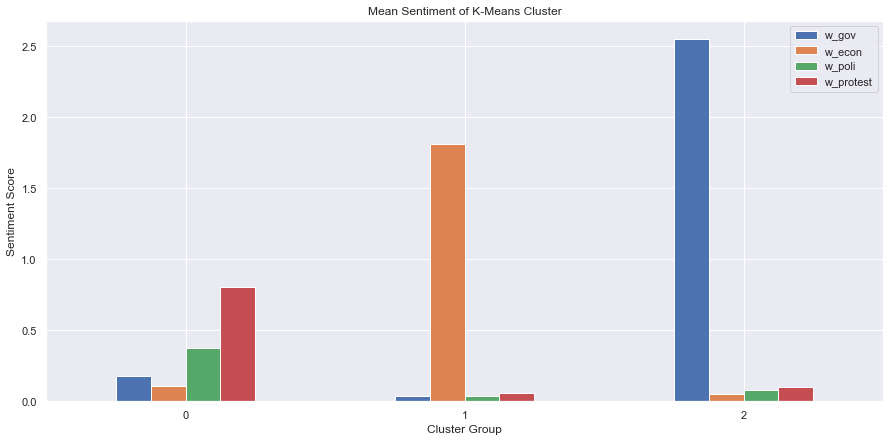

In [410]:
ratios = ['gov_ratio', 'econ_ratio', 'poli_ratio', 'protest_ratio']
sent = ['gov', 'econ', 'poli', 'protest']
wsent = ['w_gov', 'w_econ', 'w_poli', 'w_protest']
fig, ax = plt.subplots(figsize=(15,7))
viz_df.groupby('K-Means').mean()[wsent].plot(ax=ax, kind='bar')
plt.title('Mean Sentiment of K-Means Cluster')
plt.xlabel('Cluster Group')
plt.xticks(rotation=0)
plt.ylabel('Sentiment Score')
plt.show()

In [379]:
viz_func.two_d('K-Means', components=['pc1', 'pc4'])

In [389]:
viz_func.three_d('K-Means', components=['protest', 'gov', 'econ'])

In [346]:
viz_func.h_bar('K-Means')